<a href="https://colab.research.google.com/github/Rajaullanalban/python_projects/blob/main/229X1A32A8_NALBAN_RAJAULLA_Diabetes_Prediction_pynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                             **NALBAN RAJAULLA**
# Registration No: 229X1A32A8
# College : G.Pulla Reddy Engineering College
# Email : 229X1A32A8@gprec.ac.in
# Project : INDIAN DIABETES PREDICTION


In [ ]:
! pip install kaggle
! mkdir ~/. kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle dataset download -d uciml/pima-indians-diabetes-database

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
! unzip pima-indians-diabetes-database

unzip:  cannot find or open pima-indians-diabetes-database, pima-indians-diabetes-database.zip or pima-indians-diabetes-database.ZIP.


In [ ]:
import pandas as pd
df = pd.read_csv('/content/archive.zip')

In [ ]:
! unzip '/content/archive.zip'

Archive:  /content/archive.zip
  inflating: diabetes.csv            


In [ ]:
!pip install tensorflow scikit-learn pandas numpy matplotlib seaborn

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load the dataset
df = pd.read_csv('diabetes.csv')




In [ ]:
# Show first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


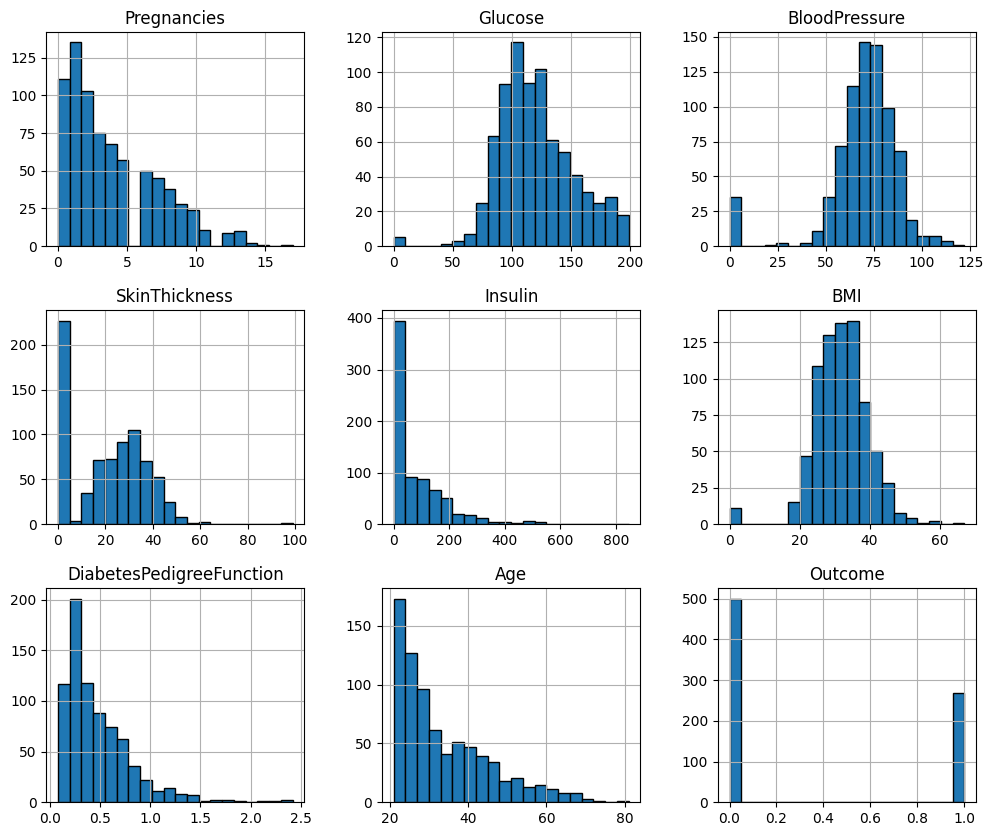

In [ ]:
# Plot histograms for each feature based on Outcome
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.show()




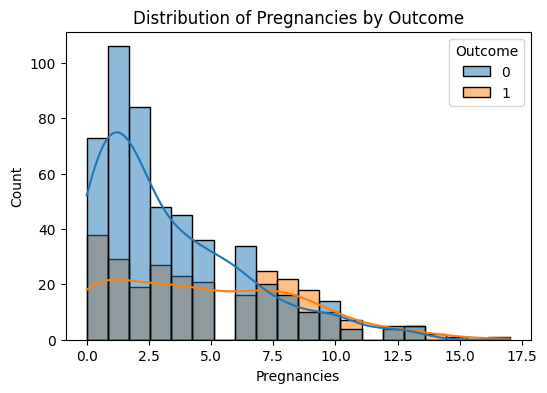

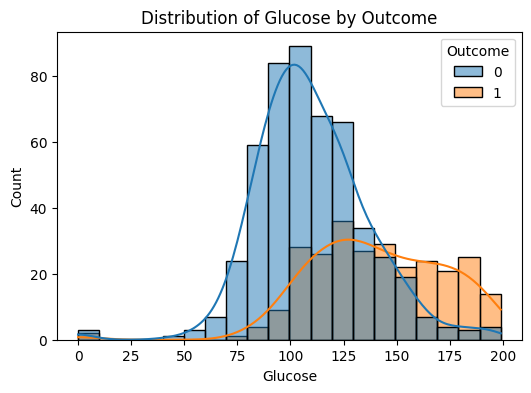

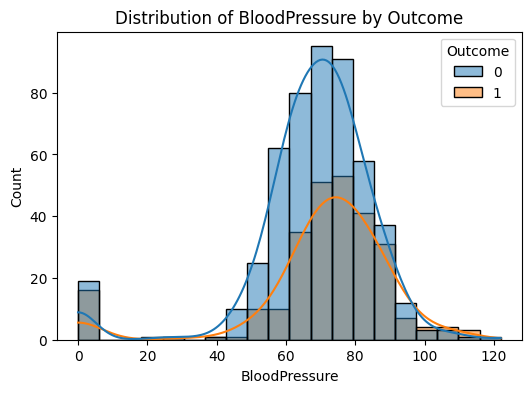

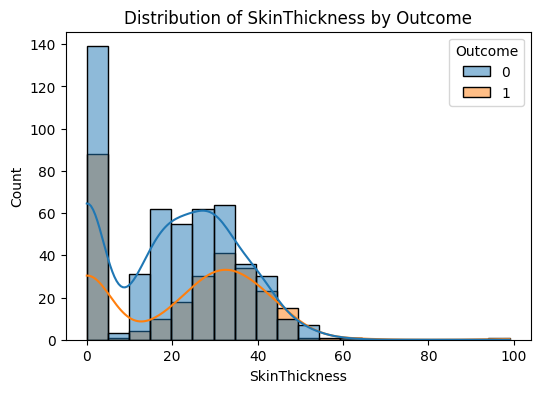

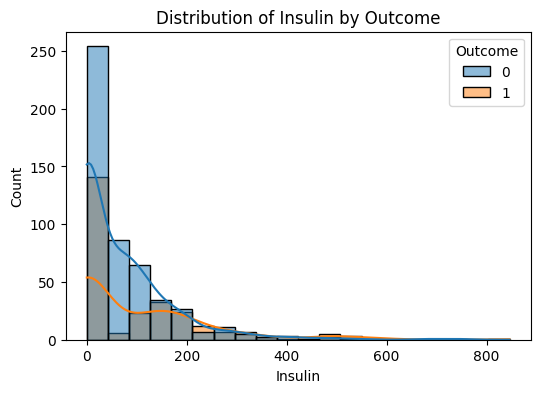

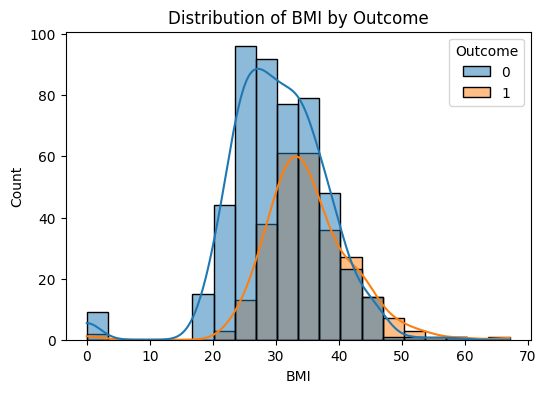

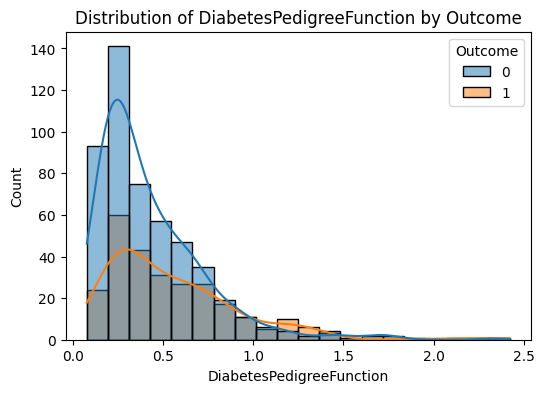

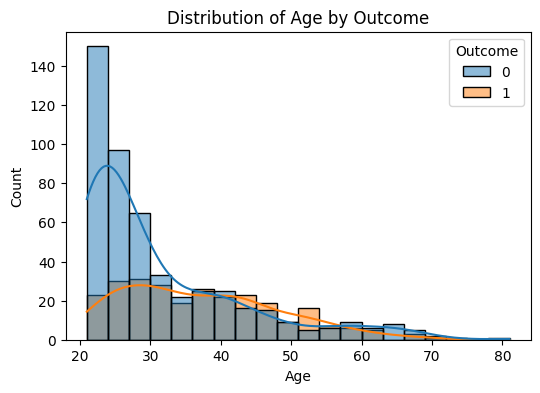

In [ ]:
# Plot feature distributions based on Outcome
for col in df.columns[:-1]:  # Exclude 'Outcome'
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Outcome', kde=True, bins=20)
    plt.title(f'Distribution of {col} by Outcome')
    plt.show()

In [ ]:
# Replace 0s with NaN in specific columns
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.NaN)




In [ ]:
# Fill NaN values with the mean of each column
df[cols] = df[cols].fillna(df[cols].mean())



In [ ]:
# Split into features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
print(df['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [ ]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)




In [ ]:
# Check class distribution after SMOTE
print("Class Distribution After SMOTE:\n", pd.Series(y_resampled).value_counts())



Class Distribution After SMOTE:
 Outcome
1    500
0    500
Name: count, dtype: int64


In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)



In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
# Reshape for CNN Input (Samples, Timesteps, Features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (800, 8, 1)
Testing data shape: (200, 8, 1)


In [ ]:
# Build CNN Model
model = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [ ]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 7, 32)               │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 6, 64)               │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,961 (113.13 KB)

 Trainable params: 28,961 (113.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6042 - loss: 0.6600 - val_accuracy: 0.7150 - val_loss: 0.5653
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7608 - loss: 0.5067 - val_accuracy: 0.7150 - val_loss: 0.5223
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7632 - loss: 0.5147 - val_accuracy: 0.7500 - val_loss: 0.4988
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7423 - loss: 0.4969 - val_accuracy: 0.7650 - val_loss: 0.5013
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7931 - loss: 0.4485 - val_accuracy: 0.7650 - val_loss: 0.4875
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7541 - loss: 0.4727 - val_accuracy: 0.7750 - val_loss: 0.4792
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7598 - loss: 0.4894 - val_accuracy: 0.7650 - val_loss: 0.4757
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7692 - loss: 0.4797 - val_accuracy: 0.7650 - val_loss

In [ ]:
# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("CNN Model Accuracy:", accuracy * 100)



CNN Model Accuracy: 80.0


In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       100
           1       0.78      0.83      0.81       100

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



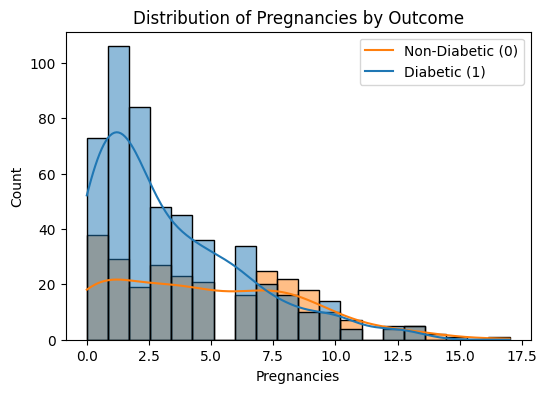

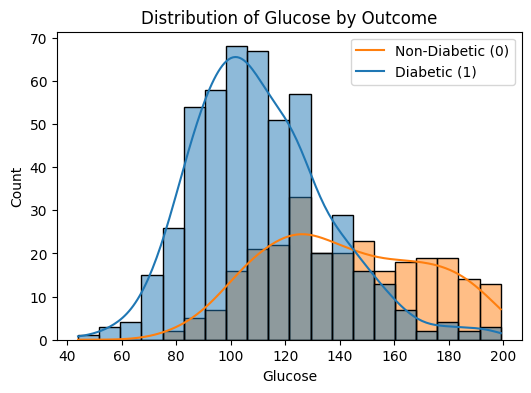

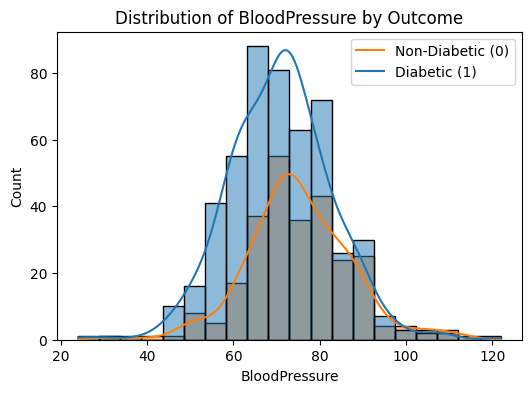

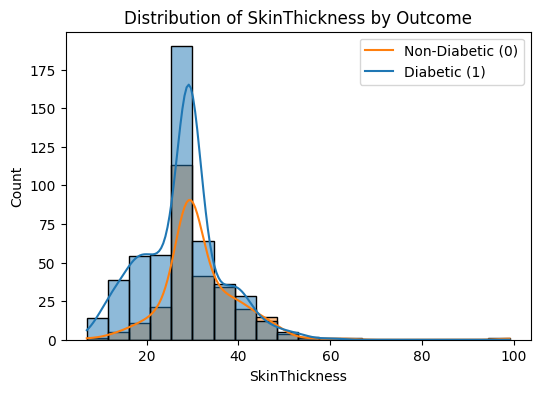

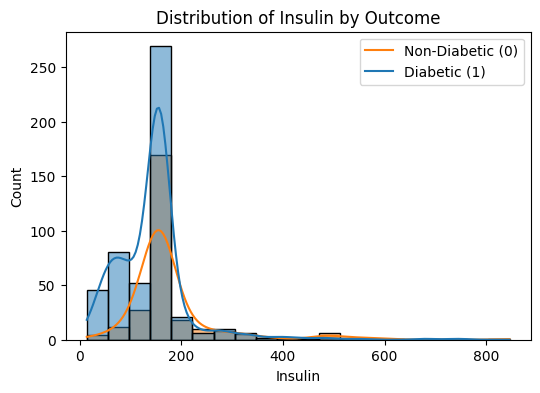

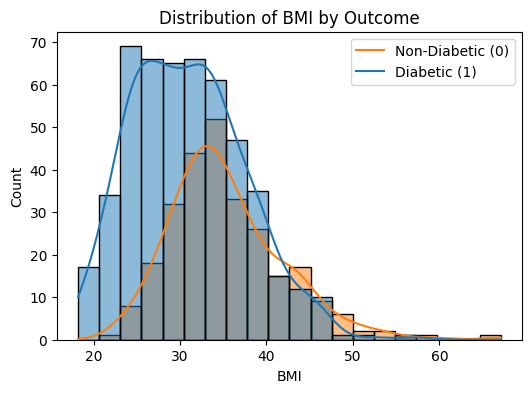

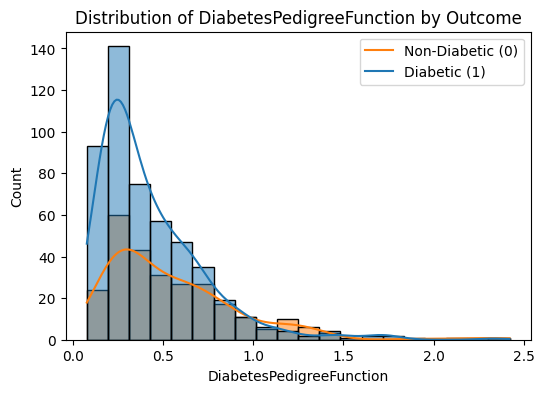

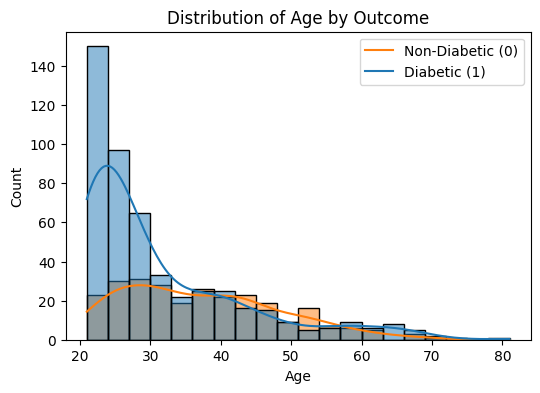

In [ ]:
# Visualize Feature Distributions Based on Outcome
for col in X.columns:  # Iterate through each feature
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Outcome', kde=True, bins=20)
    plt.title(f'Distribution of {col} by Outcome')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(['Non-Diabetic (0)', 'Diabetic (1)'])
    plt.show()

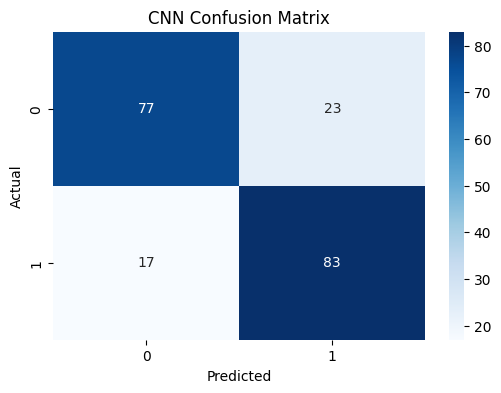

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


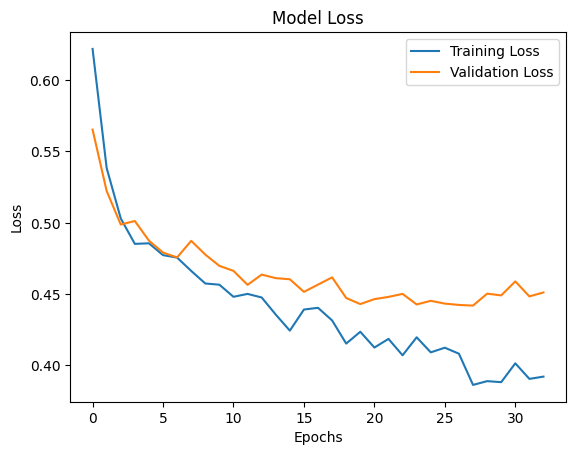

In [ ]:
# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Sample Input for Prediction
sample_data = np.array([[8,183,64,0,0,23.3,0.672,32]])
sample_data_scaled = scaler.transform(sample_data)
sample_data_reshaped = sample_data_scaled.reshape(sample_data_scaled.shape[0], sample_data_scaled.shape[1], 1)

# Predict using the CNN Model
prediction = (model.predict(sample_data_reshaped) > 0.5).astype("int32")
result = 'Diabetic' if prediction[0][0] == 1 else 'Non-Diabetic'
print("Prediction:", result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction: Non-Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [ ]:
import joblib
import tensorflow as tf

# Save model and scaler
model.save("diabetes_cnn_model.h5")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib
import tensorflow as tf

# Load the trained model and scaler
@st.cache_resource
def load_model():
    model = tf.keras.models.load_model("diabetes_cnn_model.h5")
    return model

@st.cache_resource
def load_scaler():
    scaler = joblib.load("scaler.pkl")
    return scaler

# Load model and scaler
model = load_model()
scaler = load_scaler()

# Streamlit UI
st.title("🔍 Diabetes Prediction Using CNN")
st.write("Enter the patient's medical information to predict the likelihood of diabetes.")

# User input fields
pregnancies = st.number_input("Pregnancies", min_value=0, max_value=20, value=1)
glucose = st.number_input("Glucose Level", min_value=0, max_value=300, value=100)
blood_pressure = st.number_input("Blood Pressure", min_value=0, max_value=200, value=80)
skin_thickness = st.number_input("Skin Thickness", min_value=0, max_value=100, value=20)
insulin = st.number_input("Insulin Level", min_value=0, max_value=1000, value=80)
bmi = st.number_input("BMI", min_value=0.0, max_value=100.0, value=25.0, step=0.1)
dpf = st.number_input("Diabetes Pedigree Function", min_value=0.0, max_value=3.0, value=0.5, step=0.01)
age = st.number_input("Age", min_value=0, max_value=120, value=30)

# Predict Button
if st.button("Predict Diabetes"):
    input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]])

    # Scale the input data
    input_scaled = scaler.transform(input_data)

    # Reshape for CNN model
    input_reshaped = input_scaled.reshape(input_scaled.shape[0], input_scaled.shape[1], 1)

    # Make prediction
    prediction = (model.predict(input_reshaped) > 0.5).astype("int32")
    result = "Diabetic" if prediction[0][0] == 1 else "Non-Diabetic"

    # Display result
    st.subheader(f"Prediction: {result}")
    if result == "Diabetic":
        st.error("⚠️ The patient is likely to have diabetes. Please consult a doctor.")
    else:
        st.success("✅ The patient is unlikely to have diabetes. Stay healthy!")

import openai
import os

# Set OpenAI API key (replace 'your-api-key' with your actual key or set it as an environment variable)
openai.api_key = os.getenv("Secret open AI key")


# Initialize ChatGPT model
st.title("ChatGPT Assistant")
st.write("Ask any query, and ChatGPT will answer.")

# User input
user_query = st.text_input("Enter your question:")

# Process query and generate response
if user_query:
    try:
        client = openai.OpenAI(api_key=os.getenv("Secret open AI key"))
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[{"role": "user", "content": user_query}]
        )
        st.write("**ChatGPT Response:**")
        st.write(response.choices[0].message.content)
    except Exception as e:
        st.error(f"Error: {e}")




Writing app.py


In [ ]:
!curl https://loca.lt/mytunnelpassword

35.196.109.80

In [ ]:
# Install and set up ngrok
from pyngrok import ngrok

# Kill any previous tunnel (to avoid conflicts)
ngrok.kill()

# Start Streamlit server in the background
!streamlit run app.py & npx localtunnel --port  8501

 #Get the public URL using ngrok
public_url = ngrok.connect(port='8501')
print("Streamlit App URL:", public_url)




⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.196.109.80:8501

⠦⠧Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
⠹⠸your url is: https://fresh-words-sit.loca.lt
2025-03-13 11:03:00.122794: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741863780.165632    6787 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741863780.209913    6787 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 11:03:05.848858: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call